# Assignment 7

In this assignment,you will design a low pass filter using windowing method. The first step of FIR filter design is to construct the ideal filter response $H_d(e^{j\omega})$ and find the impulse response by taking the inverse Fourier transform of it: $$h_d[n]=\frac{1}{2\pi}\int_{-\pi}^{\pi} H_d(e^{j\omega})e^{j\omega n}d\omega$$

If you take this integral, you will see that $h_d[n]$ is infinitely long and it not causal (meaning that future values are needed to compute the present value). Therefore, to have a practical filter you should shift the impulse response to ensure the causality by adding a phase factor ($e^{j\omega{\frac{M}{2}}}$) and truncate/window the ideal response to a finite length filter.

a) Determine truncated impulse response $h_1[n]$:

$$h_1[n]=\frac{1}{2\pi}\int_{-\pi}^{\pi} H_d(e^{j\omega})e^{j\omega{\frac{M}{2}}}e^{j\omega n}d\omega$$

b) Apply window:
$$h_f[n]=h_1[n]w[n]$$

c) Check the frequency response of the filter, if it does not satisfies the requirements then increase the length of the filter or change the window.

Design a FIR low pass filter where $\omega_c=\pi/5$ using rectangular and Hamming windows, take $M=30$. Remember that:

$$ H_d(e^{j\omega})=   \left\{
\begin{array}{ll}
      1 & |\omega|>\omega_c \\
      0 & otherwise \\
\end{array} 
\right.$$

$$ h_1[n]=   \left\{
\begin{array}{ll}
      \frac{\sin{\omega_c(n-\frac{M}{2})}}{\pi(n-\frac{M}{2})} & 0 \leq n \leq M \\
      0 & otherwise \\
\end{array} 
\right. $$

We can write $\frac{\sin{\omega_c(n-\frac{M}{2})}}{\pi(n-\frac{M}{2})}=\frac{\omega_c}{\pi}sinc(\frac{\omega_c}{\pi}(n-\frac{M}{2})) $.

Plot $h_f[n]$ for both rectangular window and Hamming window. Are they causal? Plot the magnitude of the frequency responses of the filters by taking the Fourier Transform of impulse responses, you can take DFT size $N=1024$ . What are the differences in the resulting filters? Explain. You can plot the frequency responses on the same figure to see the differences easily.

You are not allowed to use FIR filter function of Python (signal.firwin2) in this part, you will do it in the next step.

When comparing the results obtained from the windowing method with the results obtained from the frequency sampling method, we may see differences in the shape of the frequency response of the filters. This is because the frequency sampling method uses a set of discrete frequencies to approximate the ideal response, while the windowing method uses a continuous function to model the ideal response and then truncates it to a finite length. As a result, the frequency sampling method may produce a more accurate approximation of the ideal response, but it may also be more computationally intensive to implement.

C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\1308358516.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(n, HFhamm, 'g','+')
C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\1308358516.py:25: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(n, HFrect,'r','o')


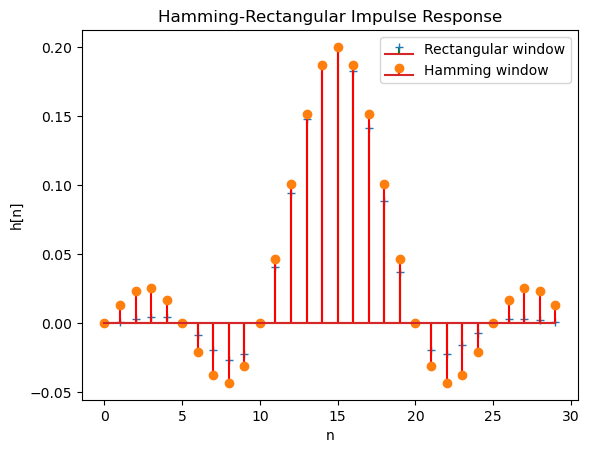

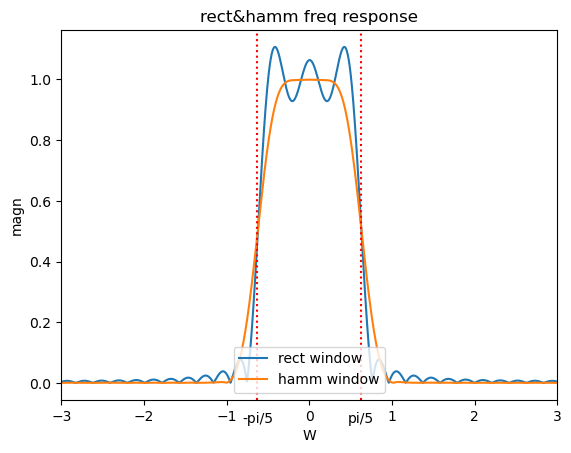

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

#write your code here
M =30
Wc = 0.2*np.pi


n = np.arange(0, M,1)
h_1 = Wc/np.pi * np.sinc(Wc*(n-M/2)/np.pi)
w = np.ones(M)
HFrect = h_1 * w

# Apply Hamming window
w = np.hamming(M)
HFhamm = h_1 * w


# impulse responses
plt.figure()

plt.title("Hamming-Rectangular Impulse Response")
plt.stem(n, HFhamm, 'g','+')
plt.stem(n, HFrect,'r','o')
plt.legend(['Rectangular window', 'Hamming window'])
plt.xlabel('n')
plt.ylabel('h[n]')

plt.show()

# Compute frequency responses
HFrect = np.fft.fft(HFrect, 1024)
HFhamm = np.fft.fft(HFhamm, 1024)
HFrect=np.fft.fftshift(HFrect)
HFhamm=np.fft.fftshift(HFhamm)


# wc=pi/5
fval = np.linspace(-np.pi,np.pi, 1024)

# frequency responses
plt.figure()

plt.plot(fval,np.abs(HFrect))
plt.plot(fval,np.abs(HFhamm))
plt.title("rect&hamm freq response")
plt.xlabel('W')
plt.ylabel('magn')

plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.14, '-pi/5', ha='center', va='bottom')

plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(+np.pi/5, -0.14, 'pi/5', ha='center', va='bottom')

plt.legend(['rect window', 'hamm window'],loc=8)

plt.show()



Now, use signal.firwin2(M,omega_vec/pi,gain_vec,window='hamming') function to design a similar filter in the previous part (a low pass filter with cut-off frequency $\pi/5$). Consider Boxcar, Hamming, Blackman and Bartlett windows. 

Plot the impulse responses and magnitude of the frequency responses of the filters. To see the sidelobes better, in another figure plot the magnitude responses of all filters in dB scale (Remember $A_{dB}=20log{|A|}$) and set y axes between 10 dB to -60 dB in order to compare the spectrums better (use plt.ylim() function). Explain the differences of the filters caused by the windows. What are the advantages and disadvantages of these filters?

You can read https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html#scipy.signal.firwin2 for more information about signal.firwin2 function.

In [44]:
#write your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


M = 30
Ω = np.linspace(0, np.pi, 32)
w = np.linspace(0, np.pi, 32)
w_1 = np.where((w >= 0) & (w <= np.pi/5), 1, 0)


bartlett_window = signal.firwin2(M, Ω/np.pi, w_1, window='bartlett')
boxcar_window = signal.firwin2(M, Ω/np.pi, w_1, window='boxcar')
hamming_window = signal.firwin2(M, Ω/np.pi, w_1, window='hamming')
blackman_window = signal.firwin2(M, Ω/np.pi, w_1, window='blackman')


HFhamm = np.fft.fft(hamming_window, 1024)
HFhamm =np.fft.fftshift(HFhamm )
HFhamm_dB=20 *np.log10(np.abs(HFhamm  + 1e-18))

HFbla = np.fft.fft(blackman_window, 1024)
HFbla=np.fft.fftshift(HFbla)
HFbla_dB=20 *np.log10(np.abs(HFbla + 1e-18))

HFbart = np.fft.fft(bartlett_window, 1024)
HFbart=np.fft.fftshift(HFbart)
HFbart_dB=20 *np.log10(np.abs(HFbart + 1e-18))


HFbox = np.fft.fft(boxcar_window, 1024)
HFbox=np.fft.fftshift(HFbox)
HFbox_dB=20*np.log10(np.abs(HFbox) + 1e-18)




impulse_rspn_bartlett = bartlett_window
impulse_rspn_boxcar = boxcar_window
impulse_rspn_hamming = hamming_window
impulse_rspn_blackman =blackman_window

x = np.arange(len(impulse_rspn_bartlett))


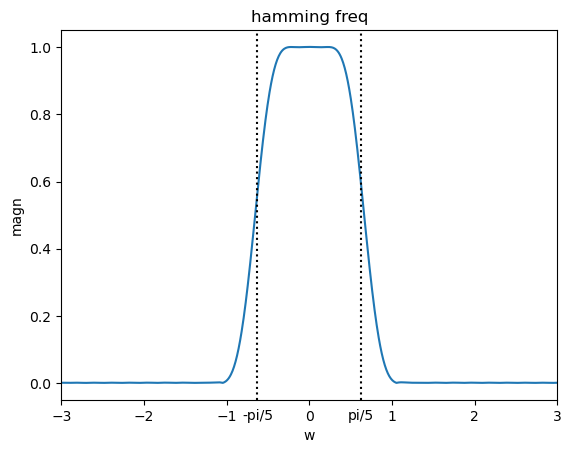

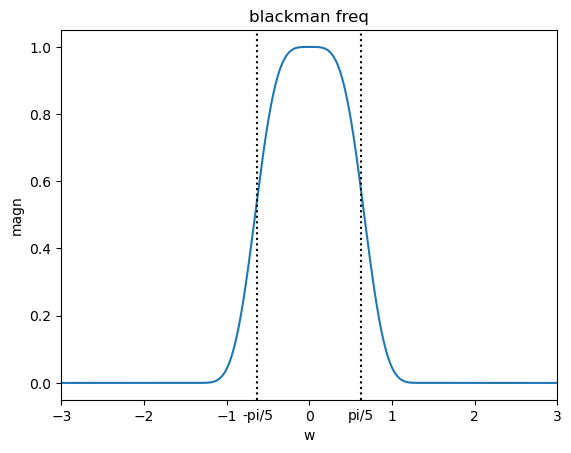

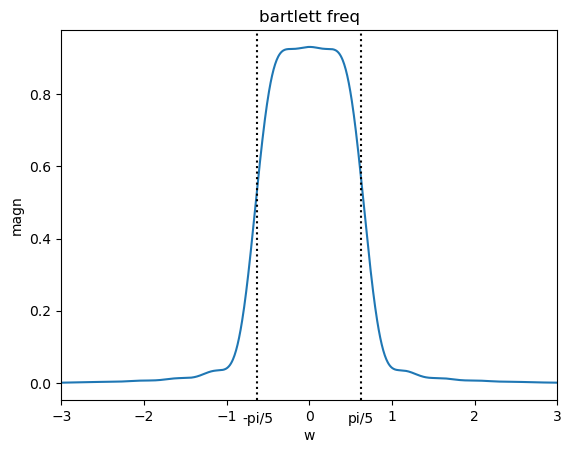

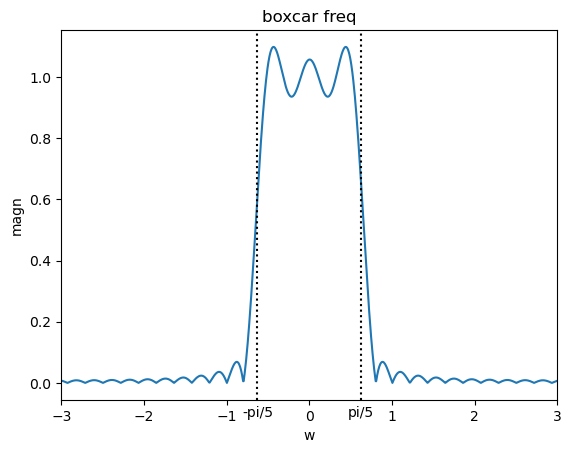

In [30]:
#wc=pi/5
fval = np.linspace(-np.pi,np.pi, 1024)



# Plot magnitude of frequency responses
plt.figure()
plt.plot(fval,np.abs(Hf_hamming))
plt.title("hamming freq")
plt.xlabel('w')
plt.ylabel('magn')
plt.xlim([-3, 3])
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')
plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.show()

plt.figure()
plt.plot(fval,np.abs(Hf_blackman))
plt.title("blackman freq")
plt.xlabel('w')
plt.ylabel('magn')
plt.xlim([-3, 3])
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')
plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.show()

plt.figure()
plt.plot(fval,np.abs(Hf_bartlett))
plt.title("bartlett freq")
plt.xlabel('w')
plt.ylabel('magn')
plt.xlim([-3, 3])
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')
plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.show()

plt.figure()
plt.plot(fval,np.abs(Hf_boxcar))
plt.title("boxcar freq")
plt.xlabel('w')
plt.ylabel('magn')
plt.xlim([-3, 3])
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')
plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.show()




C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\939714294.py:3: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, impulse_rspn_boxcar, 'g', '+')
C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\939714294.py:4: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, impulse_rspn_bartlett, 'k', '-')


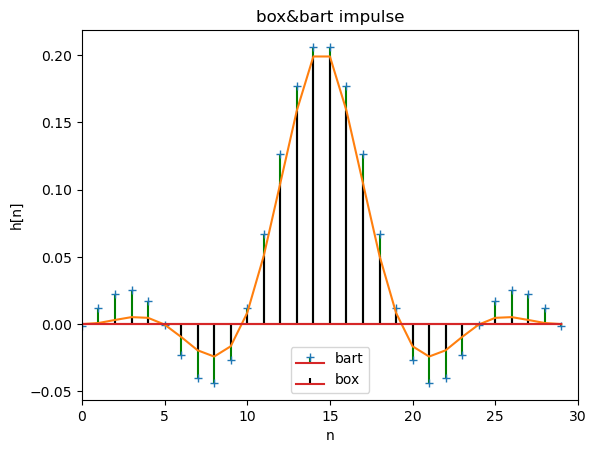

C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\939714294.py:16: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, impulse_rspn_hamming, 'b', ':')
C:\Users\ahmet\AppData\Local\Temp\ipykernel_13188\939714294.py:17: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, impulse_rspn_blackman, 'k', 'o')


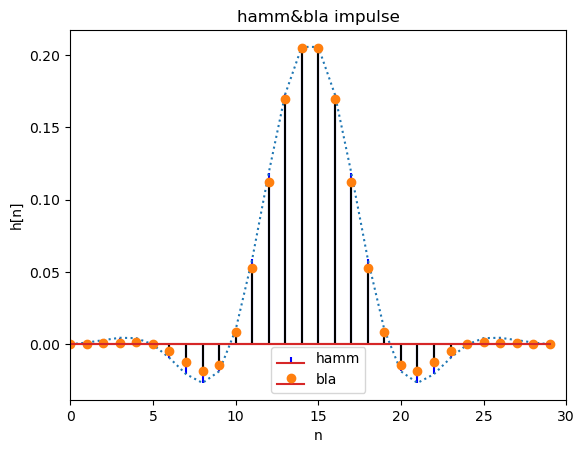

In [34]:
# Plot the impulse responses
plt.figure()
plt.stem(x, impulse_rspn_boxcar, 'g', '+')
plt.stem(x, impulse_rspn_bartlett, 'k', '-')
plt.title("box&bart impulse")
plt.xlabel('n')
plt.ylabel('h[n]')
plt.xlim([0, 30])
plt.legend(['bart', 'box'], loc=8)
plt.show()



plt.figure()
plt.title("hamm&bla impulse")
plt.stem(x, impulse_rspn_hamming, 'b', ':')
plt.stem(x, impulse_rspn_blackman, 'k', 'o')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.xlim([0, 30])
plt.legend(['hamm', 'bla'], loc=8)
plt.show()


The Hamming window is a taper formed by using a weighted cosine. It is defined as"w[n] = alpha - (1 - alpha) * cos(2 * pi * n / (M - 1))"where alpha is a coefficient that controls the balance between the main lobe width and the side lobe level. In the standard Hamming window, alpha is set to 0.54. The window has a main lobe that is narrower and side lobes that are lower compared to the rectangular window. This results in better frequency resolution and lower sidelobes in the frequency domain. However, it also has a higher main lobe level compared to the rectangular window, which can result in a higher passband ripple.
The Hamming window is widely used in signal processing and has good performance in terms of spectral properties. It is often used in spectral estimation and windowed-FFT applications.

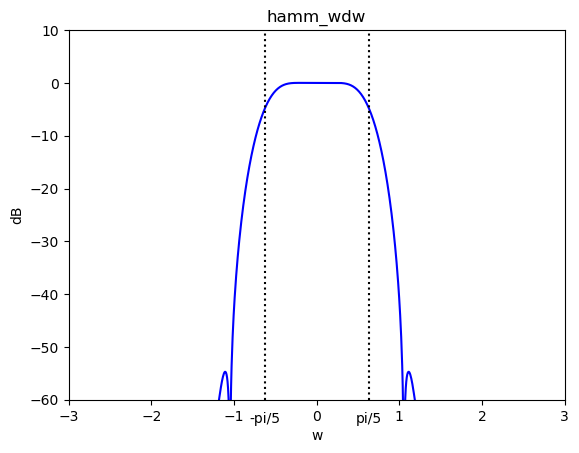

In [36]:
plt.figure()
plt.plot(fval, Hf_hamming_db,'b')
plt.title("hamm_wdw")
plt.xlabel('w')
plt.ylabel('dB')

plt.xlim([-3, 3])
plt.ylim([-60, 10])

plt.axvline(np.pi/5, color='k', linestyle=':')
plt.axvline(-np.pi/5, color='k', linestyle=':')


plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')

plt.show()

The Blackman window is a commonly used window function in signal processing. It is defined as"w(n) = 0.42 - 0.5cos(2pin/M) + 0.08cos(4pin/M)"where n is the sample index (0 to M-1) and M is the length of the window.The Blackman window has a smoother frequency response and better stopband attenuation compared to the Rectangular and Hamming windows, but it has a longer transition band. It is often used in spectral analysis and filter design applications.

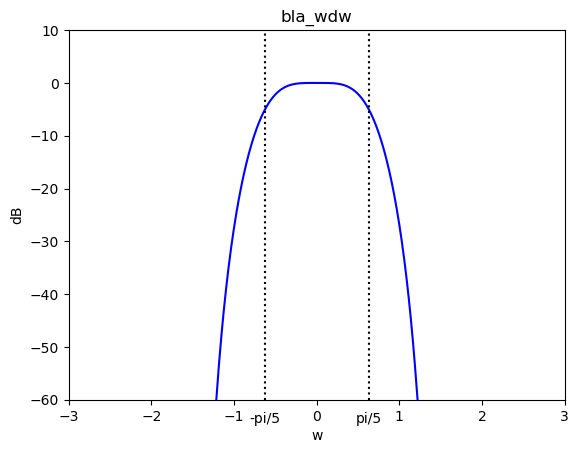

In [37]:
plt.figure()
plt.plot(fval, Hf_blackman_db,'b')
plt.title("bla_wdw")
plt.xlabel('w')
plt.ylabel('dB')

plt.xlim([-3, 3])
plt.ylim([-60, 10])

plt.axvline(np.pi/5, color='k', linestyle=':')
plt.axvline(-np.pi/5, color='k', linestyle=':')


plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')

plt.show()

The Bartlett window is a triangular window that is defined as "𝑤(𝑛)=1−|𝑛−(𝑀−1)/2|(𝑀−1)/2"where 𝑀 is the length of the window and 𝑛 is an integer between 0 and 𝑀-1 . The Bartlett window has a smooth start and end, and has a linear shape in the middle. It is often used in spectrum analysis, because it reduces the frequency resolution in the middle of the spectrum, which is usually the region of interest. However, the Bartlett window has a relatively poor frequency resolution at the edges of the spectrum.

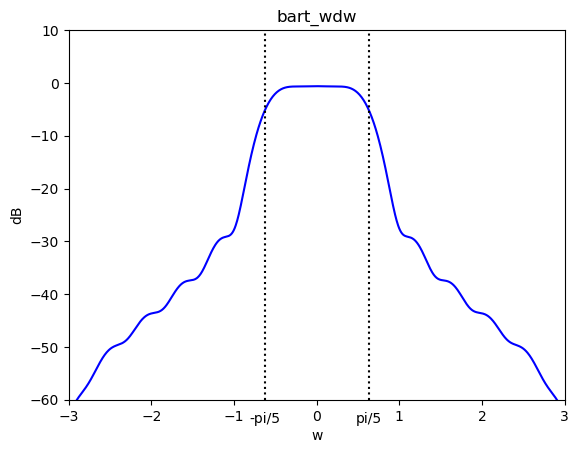

In [41]:
plt.figure()
plt.plot(fval, Hf_bartlett_db,'b')
plt.title("bart_wdw")
plt.xlabel('w')
plt.ylabel('dB')

plt.xlim([-3, 3])
plt.ylim([-60, 10])

plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')


plt.show()

The boxcar window, also known as the rectangular window, is a window function with a constant value of 1 within the window and 0 outside of it. It is defined as"boxcar(n) = { 1, if 0 ≤ n ≤ M-10, otherwise"where M is the length of the window. The boxcar window has a sharp cutoff in the frequency domain and has very good main lobe and side lobe behavior, but it has a large transition region and a poor frequency resolution. It is often used in pulse shaping applications.

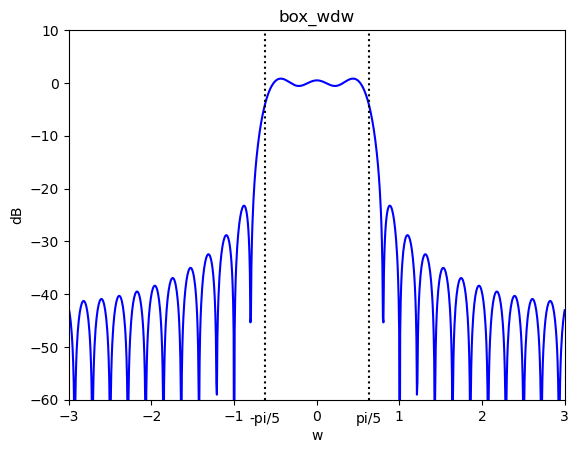

In [43]:
plt.figure()
plt.plot(fval, Hf_boxcar_db,'b')
plt.title("box_wdw")
plt.xlabel('w')
plt.ylabel('dB')

plt.xlim([-3, 3])
plt.ylim([-60, 10])

plt.axvline(-np.pi/5, color='k', linestyle=':')
plt.axvline(np.pi/5, color='k', linestyle=':')

plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')


plt.show()
